## wavelet transform

### test data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

fs = 100 
t = np.arange(0, 1, 1 / fs)
f1 = 50
f2 = 5
signal = 0.6 * np.sin(2 * np.pi * f1 * t) + 2 * np.cos(2 * np.pi * f2 * t + np.pi/2)

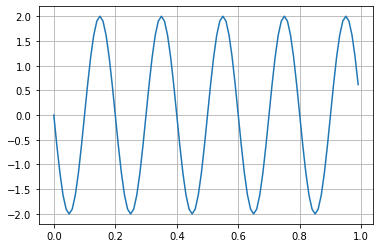

In [2]:
# visualizing signal
plt.plot(t, signal)
plt.grid()

In [3]:
import pywt

wavlist = pywt.wavelist(kind='continuous')
wavlist

['cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'mexh',
 'morl',
 'shan']

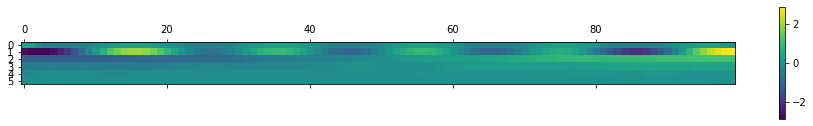

In [4]:
scales = np.asarray([1, 10, 50, 100, 200, 400])

coef, freqs=pywt.cwt(signal,scales,'mexh', sampling_period= 1)
plt.matshow(coef) # doctest: +SKIP
plt.colorbar()
plt.show()

# Arc signal wavelet transform

In [5]:
# sampling rate
fs = 10000000 # 10MHz

# signal length
t = np.arange(0, 0.5, 1 / fs) # s, sampling interval, time array

# generate signal
f1 = 60 # 60Hz
signal_f = 2*np.sin(2*np.pi*f1*t)  # amplitude = 2

# generate noise signal
np.random.seed(222)
n1 = np.random.uniform(1000000, 1500000, len(t)) # 1MHz ~ 1.5 MHz
signal_n = 0.2*np.sin(2*np.pi*n1*t)

# total signal
normal_signal = signal_f + signal_n

#  generate noise Arc signal

n3 = 4000000 # 4MHz

np.random.seed(333)
random_mag_Arc = np.random.uniform(0.8, 1.1, 1500)
signal_Arc = random_mag_Arc*np.sin(2*np.pi*n3*t[82500:84000])

signal_Arc # 아크 신호

temp = list(normal_signal) # shoulder 범위만 아크 신호를 더해주기 위해 타입변환

# shoulder 범위만 아크 신호 더하고 shoulder 범위가 아닌 부분은 아크신호를 더하지 않음.

import random
num_s =[] # shoulder 부분 Counting 역할

i,j = 1, 0
s0 = temp[82500*0+1500*0:82500*1+1500*0]
end = (82500*1)+(1500*0)

while (len(s0) != 5000000):
    start = end
    np.random.seed(0)
    num = random.randint(0,2) # 아크 신호를 랜덤하기 더해주기 위한 규칙 생성
    num_s.append(num)
    
    if i == j: # shoulder 범위가 아닐때 그냥 신호 더해줌.
        i += 1
        end = (82500*i)+(1500*j)
        s0 = s0+temp[start:end]
    elif i!=j and num == 2: # shoulder 범위 이면서 num == 2일 경우 아크 신호 더함.
        j += 1
        end = (82500*i)+(1500*j)
        x = temp[start:end] + signal_Arc
        s0 = s0+ list(x) 
    else: # shoulder 범위 이나 num은 2가 아닐 경우 노말 신호만 더해줌.
        j += 1
        end = (82500*i)+(1500*j)
        s0 = s0+ temp[start:end] 
        
sig = np.array(s0) # numpy array type으로 변환

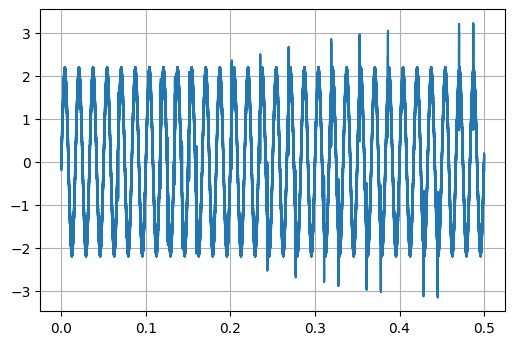

In [6]:
# visualizing signal (노말과 아크 상태를 추가하여 완성된 신호)

plt.figure(num = 1, dpi = 100)
plt.plot(t, sig)
plt.grid()

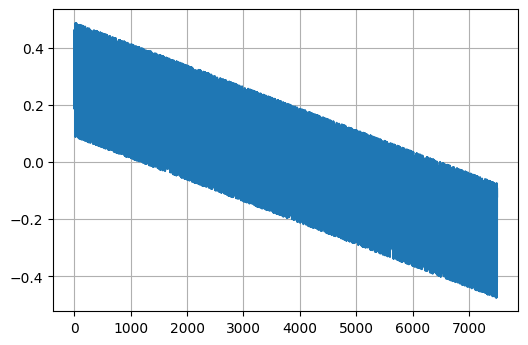

In [7]:
plt.figure(num = 1, dpi = 100)
plt.plot(sig[79500:87000])
plt.grid()

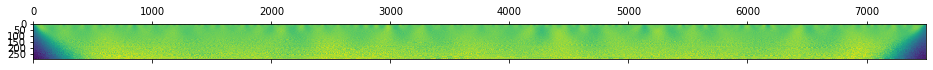

In [8]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

scales = np.arange(1, 300)
coef, freqs=pywt.cwt(sig[79500:87000], scales,'gaus1')
plt.matshow(coef) # doctest: +SKIP
plt.show()

# Verification

In [28]:
import numpy as np
import matplotlib.pyplot as plt

fs = 100
t = np.arange(0, 1, 1 / fs)
f1 = 30
no = 150

sig = 2 * np.sin(2 * np.pi * f1 * t) + 0.2 * np.sin(2 * np.pi * no * t)

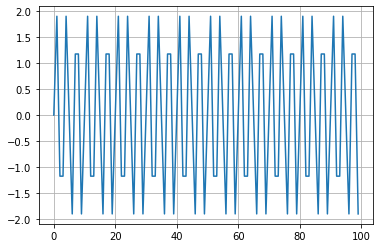

In [29]:
# visualizing signal
plt.plot(sig)
plt.grid()

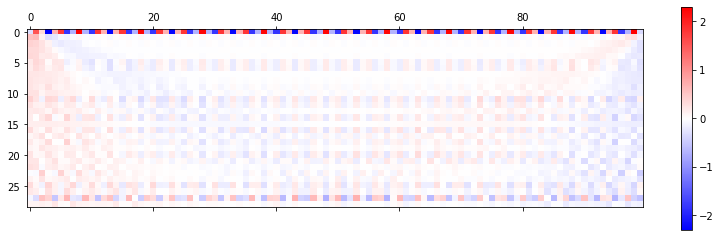

In [30]:
scales = np.arange(1, 30)

coef, freqs=pywt.cwt(sig, scales, 'mexh', sampling_period= 1)

cmap = plt.get_cmap('bwr')
plt.matshow(coef, cmap = cmap) # doctest: +SKIP
plt.colorbar()
plt.show()

c:\users\user\anaconda3\envs\etri\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


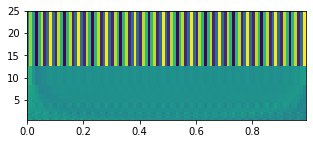

In [94]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

# Define signal
fs = 100
t = np.arange(0, 1, 1 / fs)
f1 = 30
no = 150

sig = 2 * np.sin(2 * np.pi * f1 * t) + 0.2 * np.sin(2 * np.pi * no * t)

# Calculate continuous wavelet transform
coef, freqs = pywt.cwt(sig, np.arange(1, 50), 'mexh', sampling_period = 1/fs)

# Show w.r.t. time and frequency
plt.figure(figsize=(5, 2))
plt.pcolor(t, freqs, coef)

In [92]:
freqs

array([50.        , 25.        , 16.66666667, 12.5       , 10.        ,
        8.33333333,  7.14285714,  6.25      ,  5.55555556,  5.        ,
        4.54545455,  4.16666667,  3.84615385,  3.57142857,  3.33333333,
        3.125     ,  2.94117647,  2.77777778,  2.63157895,  2.5       ,
        2.38095238,  2.27272727,  2.17391304,  2.08333333,  2.        ,
        1.92307692,  1.85185185,  1.78571429,  1.72413793,  1.66666667,
        1.61290323,  1.5625    ,  1.51515152,  1.47058824,  1.42857143,
        1.38888889,  1.35135135,  1.31578947,  1.28205128,  1.25      ,
        1.2195122 ,  1.19047619,  1.1627907 ,  1.13636364,  1.11111111,
        1.08695652,  1.06382979,  1.04166667,  1.02040816])

In [74]:
wavlist = pywt.wavelist(kind='continuous')
wavlist

['cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'mexh',
 'morl',
 'shan']

In [63]:
pywt.scale2frequency('mexh', np.arange(1,50))

array([0.25      , 0.125     , 0.08333333, 0.0625    , 0.05      ,
       0.04166667, 0.03571429, 0.03125   , 0.02777778, 0.025     ,
       0.02272727, 0.02083333, 0.01923077, 0.01785714, 0.01666667,
       0.015625  , 0.01470588, 0.01388889, 0.01315789, 0.0125    ,
       0.01190476, 0.01136364, 0.01086957, 0.01041667, 0.01      ,
       0.00961538, 0.00925926, 0.00892857, 0.00862069, 0.00833333,
       0.00806452, 0.0078125 , 0.00757576, 0.00735294, 0.00714286,
       0.00694444, 0.00675676, 0.00657895, 0.00641026, 0.00625   ,
       0.00609756, 0.00595238, 0.00581395, 0.00568182, 0.00555556,
       0.00543478, 0.00531915, 0.00520833, 0.00510204])

In [64]:
freqs

array([0.25      , 0.125     , 0.08333333, 0.0625    , 0.05      ,
       0.04166667, 0.03571429, 0.03125   , 0.02777778, 0.025     ,
       0.02272727, 0.02083333, 0.01923077, 0.01785714, 0.01666667,
       0.015625  , 0.01470588, 0.01388889, 0.01315789, 0.0125    ,
       0.01190476, 0.01136364, 0.01086957, 0.01041667, 0.01      ,
       0.00961538, 0.00925926, 0.00892857, 0.00862069, 0.00833333,
       0.00806452, 0.0078125 , 0.00757576, 0.00735294, 0.00714286,
       0.00694444, 0.00675676, 0.00657895, 0.00641026, 0.00625   ,
       0.00609756, 0.00595238, 0.00581395, 0.00568182, 0.00555556,
       0.00543478, 0.00531915, 0.00520833, 0.00510204])

In [12]:
def wavelet(sig, scale):
    max_scale = 0
    coef, freqs=pywt.cwt(sig, scales, 'mexh', sampling_period= 1)
    
    for i, n in enumerate(scales):
        if max_scale < coef[i].max():
            max_scale = coef[i].max()
            scale_size = n
            print("scale {}:".format(n), coef[i].max())
            
    coef, freqs=pywt.cwt(sig, scale_size, 'mexh', sampling_period= 1)
            
    cmap = plt.get_cmap('bwr')
    plt.matshow(coef, cmap=cmap)
    plt.colorbar(shrink=0.8, aspect=5)
    plt.show()

scale 1: 0.3405500590223095
scale 2: 1.0311021824030313
scale 3: 2.192538103167266
scale 4: 3.748915058554564
scale 5: 5.491320397781845
scale 6: 7.0773755059334835
scale 7: 8.255451707552256
scale 8: 8.863673233954286
scale 9: 8.892606265741854


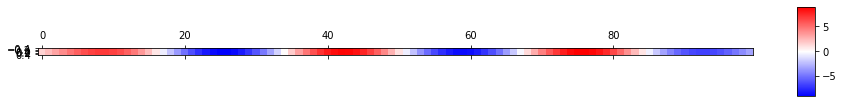

In [13]:
scales = np.arange(1, 30)

wavelet(sig, scales)

# Arc signal Verification

In [14]:
# sampling rate
fs = 10000000 # 10MHz

# signal length
t = np.arange(0, 0.5, 1 / fs) # s, sampling interval, time array

# generate signal
f1 = 60 # 60Hz
signal_f = 2*np.sin(2*np.pi*f1*t)  # amplitude = 2

# generate noise signal
np.random.seed(222)
n1 = np.random.uniform(1000000, 1500000, len(t)) # 1MHz ~ 1.5 MHz
signal_n = 0.2*np.sin(2*np.pi*n1*t)

# total signal
normal_signal = signal_f + signal_n

#  generate noise Arc signal

n3 = 4000000 # 4MHz

np.random.seed(333)
random_mag_Arc = np.random.uniform(0.8, 1.1, 1500)
signal_Arc = random_mag_Arc*np.sin(2*np.pi*n3*t[82500:84000])

signal_Arc # 아크 신호

temp = list(normal_signal) # shoulder 범위만 아크 신호를 더해주기 위해 타입변환

# shoulder 범위만 아크 신호 더하고 shoulder 범위가 아닌 부분은 아크신호를 더하지 않음.

import random
num_s =[] # shoulder 부분 Counting 역할

i,j = 1, 0
s0 = temp[82500*0+1500*0:82500*1+1500*0]
end = (82500*1)+(1500*0)

while (len(s0) != 5000000):
    start = end
    np.random.seed(0)
    num = random.randint(0,2) # 아크 신호를 랜덤하기 더해주기 위한 규칙 생성
    num_s.append(num)
    
    if i == j: # shoulder 범위가 아닐때 그냥 신호 더해줌.
        i += 1
        end = (82500*i)+(1500*j)
        s0 = s0+temp[start:end]
    elif i!=j and num == 2: # shoulder 범위 이면서 num == 2일 경우 아크 신호 더함.
        j += 1
        end = (82500*i)+(1500*j)
        x = temp[start:end] + signal_Arc
        s0 = s0+ list(x) 
    else: # shoulder 범위 이나 num은 2가 아닐 경우 노말 신호만 더해줌.
        j += 1
        end = (82500*i)+(1500*j)
        s0 = s0+ temp[start:end] 
        
sig = np.array(s0) # numpy array type으로 변환
sig = sig[79500:87000]

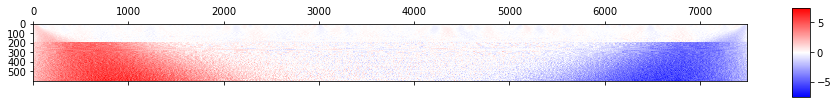

In [15]:
# scale_size = np.asarray([80, 159, 319, 640, 799, 959])
scale_size = np.array(np.arange(1, 201).tolist()+np.arange(600, 1000).tolist())
coef, freqs=pywt.cwt(sig, scale_size, 'mexh', method ='conv')
cmap = plt.get_cmap('bwr')
plt.matshow(coef, cmap=cmap)
plt.colorbar(shrink=0.8, aspect=5)
plt.show()